**Assignment01_Akansha Singhal (24925002)**

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [3]:
df = pd.read_csv('ML tutorial/student-mat.csv')
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

In [16]:
# Check for duplicates in the dataset
duplicates = df.duplicated()
print(f"Number of duplicate rows: {duplicates.sum()}")

Number of duplicate rows: 0


In [5]:
df['school'].value_counts()

school
GP    349
MS     46
Name: count, dtype: int64

In [7]:
df['sex'].value_counts()

sex
F    208
M    187
Name: count, dtype: int64

## Univariate Analysis

Text(0.5, 1.0, 'age distribution')

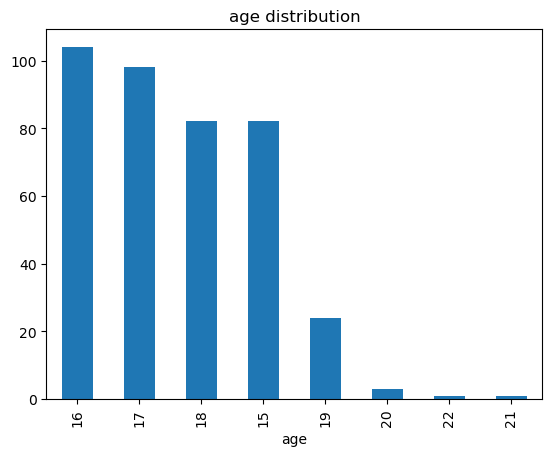

In [35]:
df['age'].value_counts().plot(kind='bar')
plt.title('age distribution')

Text(0.5, 1.0, 'workingday alcohol consumption ')

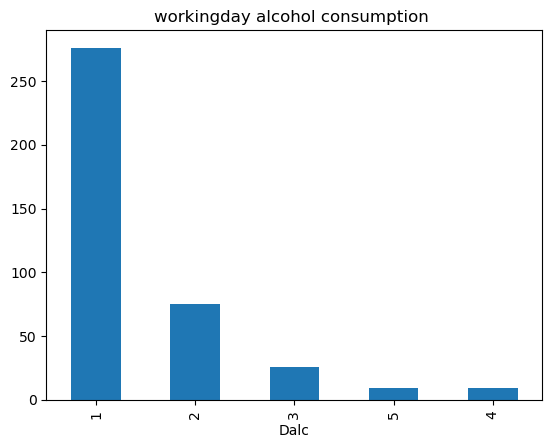

In [4]:
df['Dalc'].value_counts().plot(kind="bar")
plt.title('workingday alcohol consumption ')
# maximum student consumes very low alcohol consuption on working days.

Text(0.5, 1.0, 'Health of students')

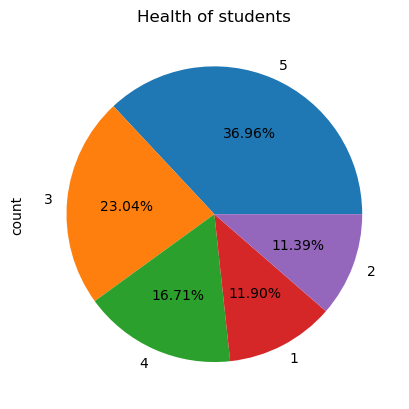

In [37]:
df['health'].value_counts().plot(kind="pie",autopct="%1.2f%%")
plt.title('Health of students')
# (numeric: from 1 - very bad to 5 - very good)
#  health proportion of students in not good.

In [81]:
df.groupby('Dalc')['Walc'].value_counts()

Dalc  Walc
1     1       150
      2        65
      3        42
      4        15
      5         4
2     3        29
      4        22
      2        18
      5         5
      1         1
3     4        11
      3         8
      5         6
      2         1
4     5         4
      4         3
      2         1
      3         1
5     5         9
Name: count, dtype: int64

### Bivariate anaysis

<Axes: xlabel='Walc', ylabel='Dalc'>

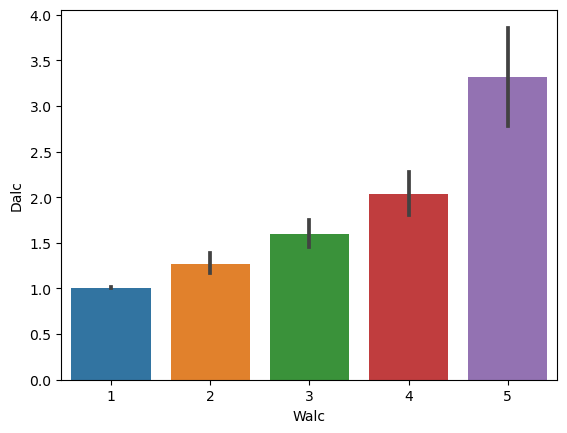

In [82]:
sns.barplot(data=df,x='Walc', y="Dalc")
# student with high Dalc also have high Walc
# Dalc - workday alcohol consumption (numeric: from 1 - very low to 5 - very high)
# Walc - weekend alcohol consumption (numeric: from 1 - very low to 5 - very high)

In [19]:
df.groupby('sex')['Dalc'].value_counts()

sex  Dalc
F    1       167
     2        33
     3         5
     4         2
     5         1
M    1       109
     2        42
     3        21
     5         8
     4         7
Name: count, dtype: int64

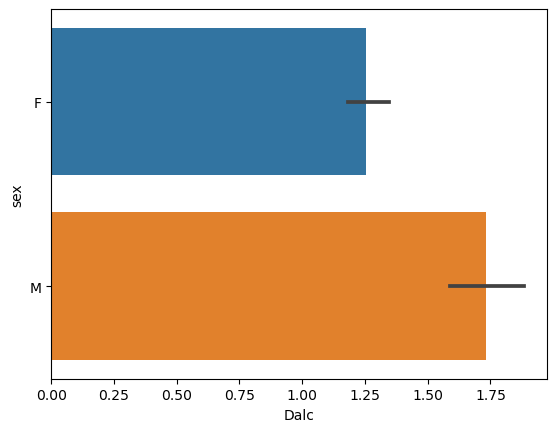

In [8]:
sns.barplot(data=df,x='Dalc', y="sex")
plt.show()
# girls consumes less alcoholthan boys.

In [61]:
df.loc[df['Dalc'] == df['Dalc'].max()]

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
29,GP,M,16,U,GT3,T,4,4,teacher,teacher,...,4,4,5,5,5,5,16,10,12,11
61,GP,F,16,U,GT3,T,1,1,services,services,...,5,5,5,5,5,5,6,10,8,11
66,GP,M,15,U,GT3,A,4,4,other,services,...,1,3,3,5,5,3,4,13,13,12
100,GP,M,16,U,GT3,T,4,4,services,services,...,4,5,5,5,5,4,14,7,7,5
223,GP,M,18,U,GT3,T,2,2,other,other,...,3,3,3,5,5,4,0,12,13,13
236,GP,M,17,U,LE3,T,2,2,other,other,...,4,4,2,5,5,4,4,14,13,13
247,GP,M,22,U,GT3,T,3,1,services,services,...,5,4,5,5,5,1,16,6,8,8
327,GP,M,17,R,GT3,T,2,2,services,other,...,4,4,5,5,5,4,8,11,10,10
349,MS,M,18,R,GT3,T,3,2,other,other,...,2,5,5,5,5,5,10,11,13,13


In [ ]:
# students which have high consumption of alcohol have much free time, belongs to urban areas, sex- male , school - GP

In [66]:
df.loc[df['Dalc'] == 4]

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
54,GP,F,15,U,LE3,A,3,3,other,other,...,5,3,4,4,4,1,6,10,13,13
159,GP,M,16,U,GT3,T,3,3,other,services,...,4,5,5,4,4,5,4,10,12,12
175,GP,M,17,U,LE3,T,4,3,teacher,other,...,4,4,4,4,4,4,4,10,9,9
192,GP,M,17,U,GT3,T,1,2,at_home,services,...,4,4,4,4,5,5,12,7,8,8
211,GP,M,17,U,LE3,T,4,4,services,other,...,5,3,5,4,5,3,13,12,12,13
228,GP,M,18,U,LE3,T,2,1,at_home,other,...,4,3,2,4,5,3,14,10,8,9
369,MS,F,18,R,GT3,T,4,4,other,teacher,...,3,2,2,4,2,5,10,14,12,11
384,MS,M,18,R,GT3,T,4,2,other,other,...,5,4,3,4,3,3,14,6,5,5
390,MS,M,20,U,LE3,A,2,2,services,services,...,5,5,4,4,5,4,11,9,9,9


In [25]:
df.groupby('Dalc')['famsize'].value_counts()

Dalc  famsize
1     GT3        208
      LE3         68
2     GT3         47
      LE3         28
3     GT3         14
      LE3         12
4     LE3          5
      GT3          4
5     GT3          8
      LE3          1
Name: count, dtype: int64

In [42]:
df.groupby('sex')['health'].value_counts()

sex  health
F    5         63
     3         52
     4         37
     1         31
     2         25
M    5         83
     3         39
     4         29
     2         20
     1         16
Name: count, dtype: int64

<Axes: xlabel='sex', ylabel='health'>

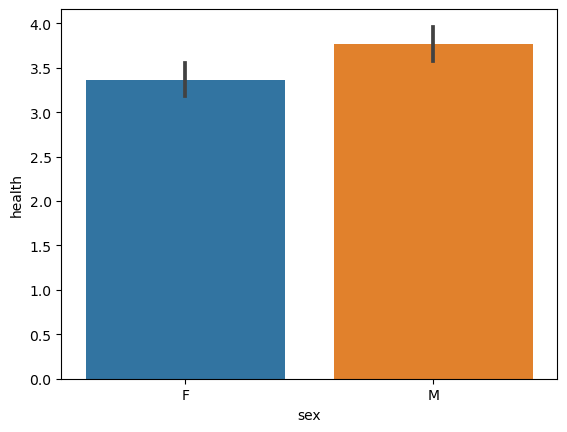

In [86]:
sns.barplot(data=df,x='sex', y="health")

Text(0.5, 0, 'working day alcohol consumption')

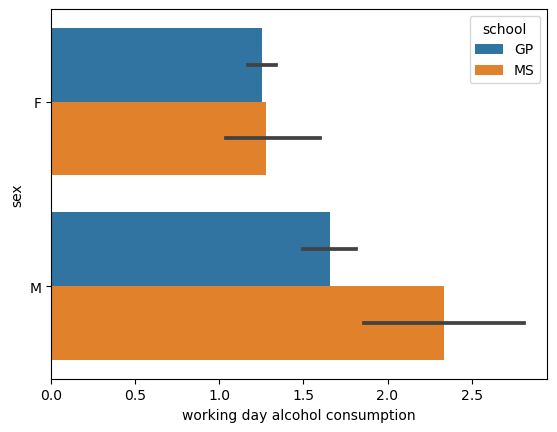

In [85]:
sns.barplot(data=df,x="Dalc",y="sex", hue='school')
plt.xlabel('working day alcohol consumption')
# boys consumes more alcohol than girls.

Text(0.5, 0, 'working day alcohol consumption')

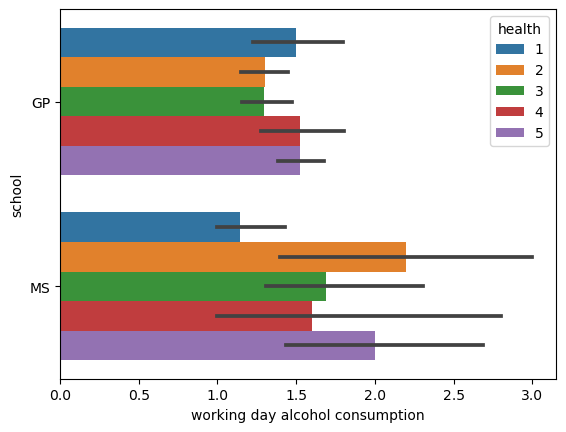

In [50]:
sns.barplot(data=df,x="Dalc",y="school", hue='health')
plt.xlabel('working day alcohol consumption')
# health of students in MS(Mousinho da Silveira) school is more poor.

In [59]:
df.groupby('Pstatus')['Dalc'].value_counts()

Pstatus  Dalc
A        1        29
         2         5
         3         4
         4         2
         5         1
T        1       247
         2        70
         3        22
         5         8
         4         7
Name: count, dtype: int64

<Axes: xlabel='Dalc', ylabel='Pstatus'>

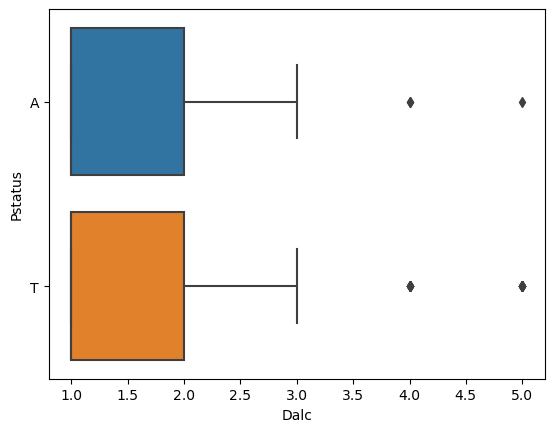

In [54]:
sns.boxplot(data=df, x="Dalc", y="Pstatus")

Pstatus - parent's cohabitation status (binary: 'T' - living together or 'A' - apart)
so parent's cohabitation status  doesnot effect Dalc.

In [68]:
df.groupby('freetime')['Dalc'].value_counts()

freetime  Dalc
1         1        17
          2         1
          3         1
2         1        51
          2         9
          3         3
          4         1
3         1       113
          2        33
          3         6
          4         3
          5         2
4         1        73
          2        23
          3        12
          5         4
          4         3
5         1        22
          2         9
          3         4
          5         3
          4         2
Name: count, dtype: int64

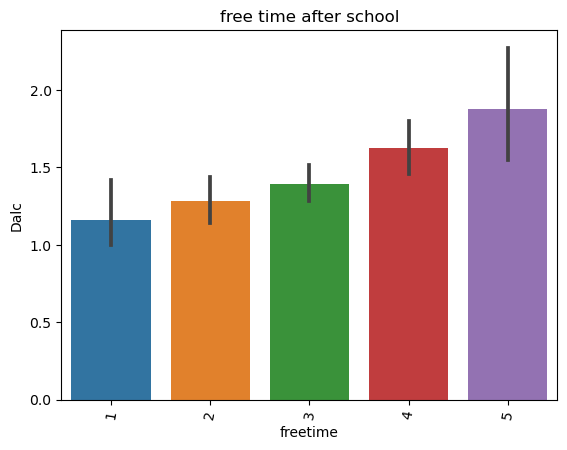

In [67]:
sns.barplot(data=df,x="freetime", y="Dalc")
plt.title('free time after school')
plt.xticks(rotation=80)
plt.show()

## students with higher free time consumes more alcohol.

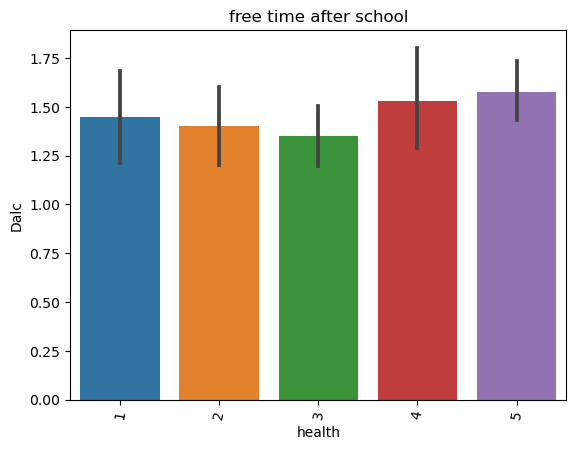

In [69]:
sns.barplot(data=df,x="health", y="Dalc")
plt.title('health status')
plt.xticks(rotation=80)
plt.show()
## health of more consuming alcohol students is poor than others

<Axes: xlabel='Dalc', ylabel='address'>

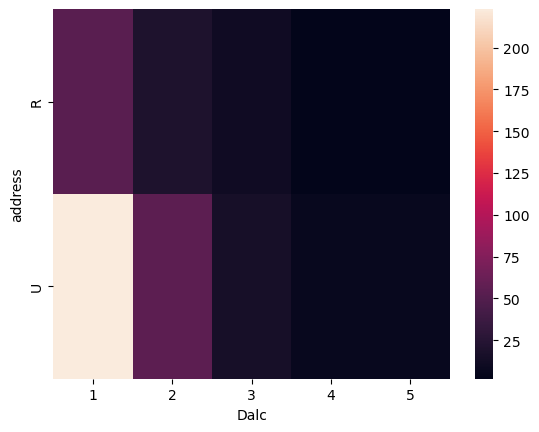

In [72]:
sns.heatmap(pd.crosstab(df['address'],df['Dalc']))

In [ ]:
# students belongs to urban areas are more consuming alcohol.

In [73]:
pd.crosstab(df['Medu'],df['Dalc'])

Dalc,1,2,3,4,5
Medu,,,,,
0,1,2,0,0,0
1,39,12,6,1,1
2,82,14,2,2,3
3,63,21,11,2,2
4,91,26,7,4,3


<Axes: xlabel='Dalc', ylabel='Medu'>

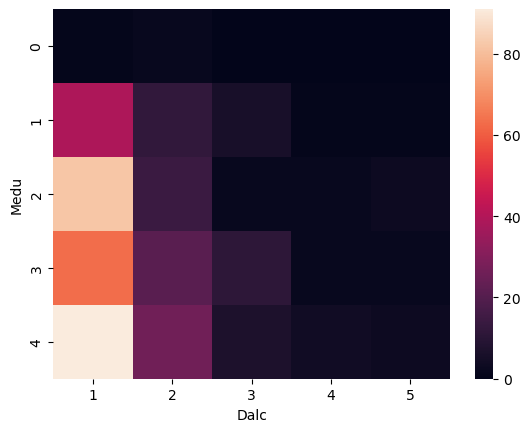

In [76]:
sns.heatmap(pd.crosstab(df['Medu'],df['Dalc']))
# students with less alcohol consumption is positively depends on mothers education similarly for fathers eduacation.

In [74]:
pd.crosstab(df['Fedu'],df['Dalc'])

Dalc,1,2,3,4,5
Fedu,,,,,
0,2,0,0,0,0
1,55,16,8,1,2
2,79,23,6,3,4
3,79,14,4,3,0
4,61,22,8,2,3


In [78]:
pd.crosstab(df['guardian'],df['Dalc'])

Dalc,1,2,3,4,5
guardian,,,,,
father,60,19,6,3,2
mother,195,51,16,4,7
other,21,5,4,2,0


<Axes: xlabel='guardian', ylabel='Dalc'>

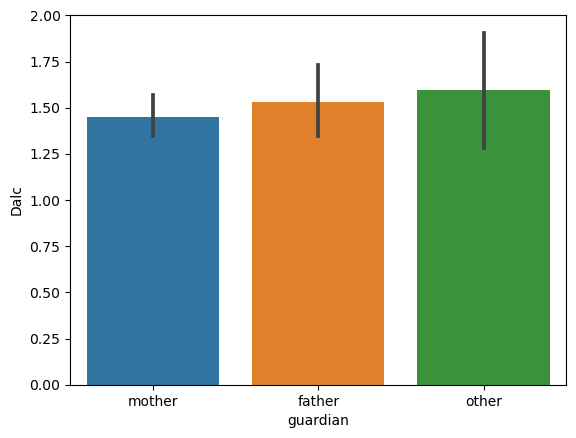

In [80]:
sns.barplot(data=df, x="guardian", y="Dalc")
# students living with other than mother , father have higher possiblity to more addiction towards alcohol  

<Axes: xlabel='Dalc'>

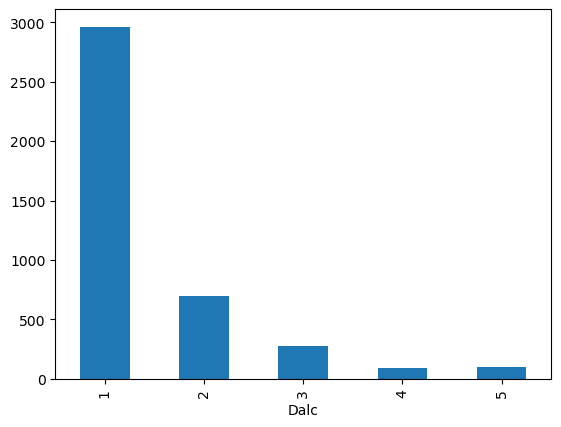

In [95]:
(df.groupby('Dalc').sum()['G3']).plot(kind="bar")

<Axes: xlabel='Dalc'>

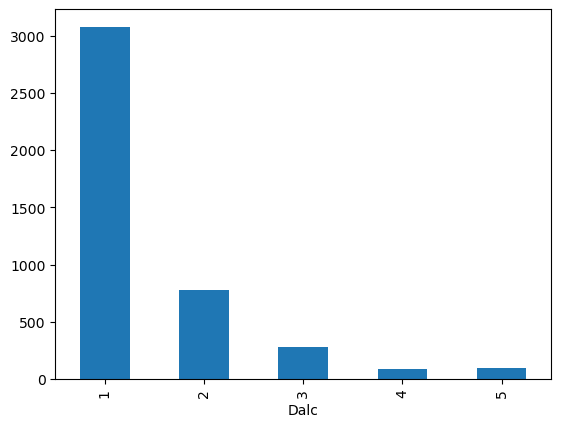

In [94]:
(df.groupby('Dalc').sum()['G1']).plot(kind="bar")
## students grades decreases alongwith Dalc.

In [101]:
df.groupby('Dalc')['goout'].value_counts()
## goout - going out with friends, is greater for students having High consuming alcohol 

Dalc  goout
1     3        99
      2        81
      4        50
      5        26
      1        20
2     4        23
      3        22
      2        16
      5        12
      1         2
3     4         9
      5         7
      3         6
      2         3
      1         1
4     4         4
      2         2
      5         2
      3         1
5     5         6
      3         2
      2         1
Name: count, dtype: int64

In [100]:
df.groupby('Dalc')['studytime'].value_counts()

Dalc  studytime
1     2            141
      1             59
      3             53
      4             23
2     2             38
      1             24
      3             11
      4              2
3     1             15
      2              9
      3              1
      4              1
4     2              7
      1              2
5     1              5
      2              3
      4              1
Name: count, dtype: int64

<Axes: xlabel='Dalc'>

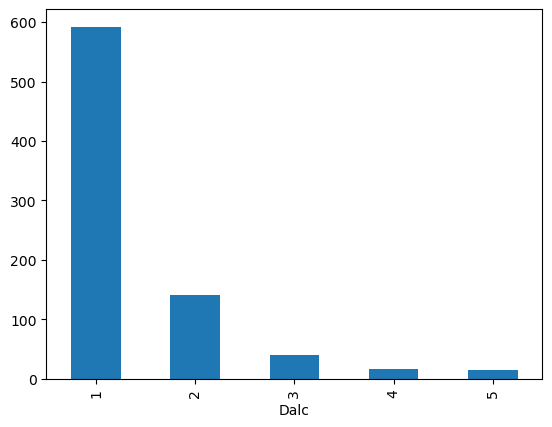

In [96]:
(df.groupby('Dalc').sum()['studytime']).plot(kind="bar")

### Conclusions:

1. health statistics is not good overall
2. student with high Dalc also have high Walc
3. Boys have more alcohol consuption than girls.
4. Overall health statics of girls is poor than Boys
5. health of students in MS(Mousinho da Silveira) school is more poor.
6. parent's cohabitation status  doesnot effect Dalc
7. students with higher free time consumes more alcohol
8. health of more consuming alcohol students is poor than others
9. students with less alcohol consumption is positively depends on mothers education similarly for fathers eduacation.
10. students living with other than mother , father have higher possiblity to more addiction towards alcohol
11. Grades of students decreases as their alcohol consumpion increases.
12. goout - going out with friends time is more for students having high Dalc 
13. study time is very less of students who consumes more alcohol

Column index explanation:

school - student's school (binary: 'GP' - Gabriel Pereira or 'MS' - Mousinho da Silveira)
sex - student's sex (binary: 'F' - female or 'M' - male)
age - student's age (numeric: from 15 to 22)
address - student's home address type (binary: 'U' - urban or 'R' - rural)
famsize - family size (binary: 'LE3' - less or equal to 3 or 'GT3' - greater than 3)
Pstatus - parent's cohabitation status (binary: 'T' - living together or 'A' - apart)
Medu - mother's education (numeric: 0 - none, 1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education)
Fedu - father's education (numeric: 0 - none, 1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education)
Mjob - mother's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')
Fjob - father's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')
reason - reason to choose this school (nominal: close to 'home', school 'reputation', 'course' preference or 'other')
guardian - student's guardian (nominal: 'mother', 'father' or 'other')
traveltime - home to school travel time (numeric: 1 - <15 min., 2 - 15 to 30 min., 3 - 30 min. to 1 hour, or 4 - >1 hour)
studytime - weekly study time (numeric: 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours)
failures - number of past class failures (numeric: n if 1<=n<3, else 4)
schoolsup - extra educational support (binary: yes or no)
famsup - family educational support (binary: yes or no)
paid - extra paid classes within the course subject (Math or Portuguese) (binary: yes or no)
activities - extra-curricular activities (binary: yes or no)
nursery - attended nursery school (binary: yes or no)
higher - wants to take higher education (binary: yes or no)
internet - Internet access at home (binary: yes or no)
romantic - with a romantic relationship (binary: yes or no)
famrel - quality of family relationships (numeric: from 1 - very bad to 5 - excellent)
freetime - free time after school (numeric: from 1 - very low to 5 - very high)
goout - going out with friends (numeric: from 1 - very low to 5 - very high)
Dalc - workday alcohol consumption (numeric: from 1 - very low to 5 - very high)
Walc - weekend alcohol consumption (numeric: from 1 - very low to 5 - very high)
health - current health status (numeric: from 1 - very bad to 5 - very good)
absences - number of school absences (numeric: from 0 to 93)
These grades are related with the course subject, Math or Portuguese:

G1 - first period grade (numeric: from 0 to 20)
G2 - second period grade (numeric: from 0 to 20)
G3 - final grade (numeric: from 0 to 20, output target)
Additional note: there are several (382) students that belong to both datasets .
These students can be identified by searching for identical attributes